In [1]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc

def drawlattice(n, name):
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            plt.plot(i, j, 'o', c = 'black')
    plt.savefig(name)

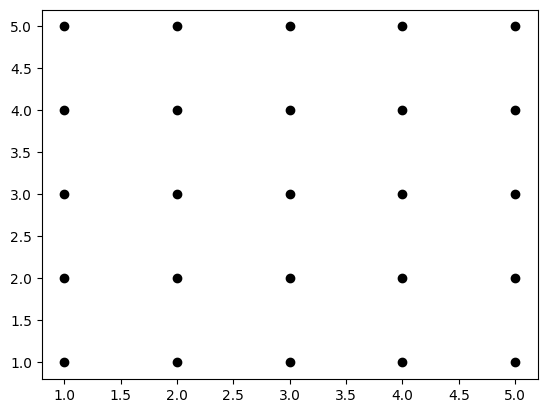

In [2]:
drawlattice(5, 'lattice.png')

In [2]:
game = [[(1,2),(1,1)],[(3,3),(4,3)],[(1,5),(2,5)],[(1,2),(2,2)],[(2,2),(2,1)],[(1,1),(2,1)],[(3,4),(3,3)],[(3,4),(4,4)]]

In [3]:
def drawgame(n, name, game):
    colors2 = []
    
    for k in range(0,len(game)):
        if k % 2 == 0:
            colors2.append('red')
        else:
            colors2.append('blue')
            
    lc = mc.LineCollection(game, colors=colors2, linewidths=2)
    fig, ax = plt.subplots()
    
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            plt.plot(i, j, 'o', c = 'black')
            
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    plt.savefig(name)

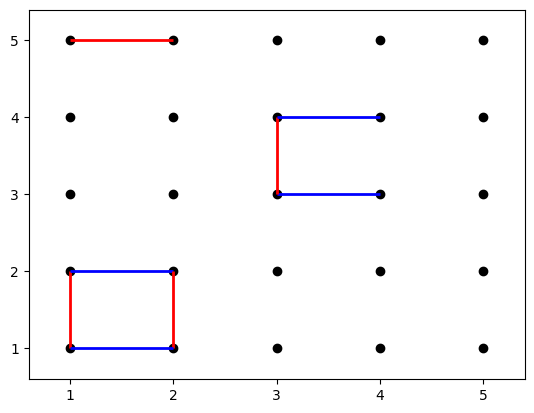

In [5]:
drawgame(5, 'gameinprogress.png', game)

In [4]:
def squarefinder(game):
    """Функция для подсчета квадратов в игре «Точки и квадраты»"""
    countofsquares = 0
    
    for line in game:
        parallel = False
        left=False
        right=False
        
        if line[0][1] == line[1][1]:
            if [(line[0][0], line[0][1]-1), (line[1][0], line[1][1]-1)] in game:
                parallel=True
            if [(line[0][0], line[0][1]), (line[1][0]-1, line[1][1]-1)] in game:
                left=True
            if [(line[0][0]+1, line[0][1]), (line[1][0], line[1][1]-1)] in game:
                right=True
            if parallel and left and right:
                countofsquares += 1
    
    return countofsquares

In [5]:
def score(game):
    """Функция для вычисления текущего счета игры «Точки и квадраты»"""
    score = [0, 0]
    progress = []
    squares = 0
    
    for line in game:
        progress.append(line)
        newsquares = squarefinder(progress)
        
        if newsquares > squares:
            if len(progress) % 2 == 0:
                score[1] = score[1] + 1
            else:
                score[0] = score[0] + 1
                
        squares = newsquares
    return score 

In [6]:
print(score(game))

[0, 1]


In [7]:
allpossible = []
gamesize = 5

for i in range(1, gamesize + 1):
    for j in range(2, gamesize + 1):
        allpossible.append([(i,j), (i,j - 1)])
        
for i in range(1, gamesize):
    for j in range(1, gamesize + 1):
        allpossible.append([(i,j),(i + 1,j)])
        
for move in allpossible:
    if move in game:
        allpossible.remove(move)
        
print(allpossible)

[[(1, 3), (1, 2)], [(1, 4), (1, 3)], [(1, 5), (1, 4)], [(2, 3), (2, 2)], [(2, 4), (2, 3)], [(2, 5), (2, 4)], [(3, 2), (3, 1)], [(3, 3), (3, 2)], [(3, 5), (3, 4)], [(4, 2), (4, 1)], [(4, 3), (4, 2)], [(4, 4), (4, 3)], [(4, 5), (4, 4)], [(5, 2), (5, 1)], [(5, 3), (5, 2)], [(5, 4), (5, 3)], [(5, 5), (5, 4)], [(1, 2), (2, 2)], [(1, 3), (2, 3)], [(1, 4), (2, 4)], [(2, 1), (3, 1)], [(2, 2), (3, 2)], [(2, 3), (3, 3)], [(2, 4), (3, 4)], [(2, 5), (3, 5)], [(3, 1), (4, 1)], [(3, 2), (4, 2)], [(3, 4), (4, 4)], [(3, 5), (4, 5)], [(4, 1), (5, 1)], [(4, 2), (5, 2)], [(4, 3), (5, 3)], [(4, 4), (5, 4)], [(4, 5), (5, 5)]]


In [8]:
def generate_tree(possible_moves, depth, maxdepth, game_so_far):
    """Функция, генерирующая дерево игры с ходами-потомками и текущим счетом"""
    tree = []
    
    for move in possible_moves:
        move_profile = [move]
        game2 = game_so_far.copy()
        game2.append(move)
        move_profile.append(score(game2))
        
        if depth < maxdepth:
            possible_moves2 = possible_moves.copy()
            possible_moves2.remove(move)
            move_profile.append(generate_tree(possible_moves2, depth + 1, maxdepth, game2))
        else:
            move_profile.append([])
        
        tree.append(move_profile)
    
    return tree

In [9]:
allpossible = [[(4,4),(4,3)], [(4,1),(5,1)]]
thetree = generate_tree(allpossible, 0, 1, [])
print(thetree)

[[[(4, 4), (4, 3)], [0, 0], [[[(4, 1), (5, 1)], [0, 0], []]]], [[(4, 1), (5, 1)], [0, 0], [[[(4, 4), (4, 3)], [0, 0], []]]]]


In [10]:
import numpy as np

def minimax(max_or_min, tree):
    """
    Функция, использующая минимаксный алгоритм для 
    нахождения лучшего хода в дереве игры
    """
    allscores = []
    
    for move_profile in tree:
        if move_profile[2] == []:
            allscores.append(move_profile[1][0] - move_profile[1][1])
        else:
            move, score = minimax((-1) * max_or_min, move_profile[2])
            allscores.append(score)
            
    newlist = [score * max_or_min for score in allscores]
    bestscore = max(newlist)
    bestmove = np.argmax(newlist)
    return(bestmove, max_or_min * bestscore)

In [11]:
allpossible = []
game = [[(1,2),(1,1)],[(3,3),(4,3)],[(1,5),(2,5)],[(1,2),(2,2)],[(2,2),(2,1)],\
        [(1,1),(2,1)],[(3,4),(3,3)],[(3,4),(4,4)]]

gamesize = 5

for i in range(1, gamesize + 1):
    for j in range(2, gamesize + 1):
        allpossible.append([(i,j), (i,j - 1)])
        
for i in range(1, gamesize):
    for j in range(1, gamesize + 1):
        allpossible.append([(i,j), (i + 1,j)])
        
for move in allpossible:
    if move in game:
        allpossible.remove(move)
        
thetree = generate_tree(allpossible, 0, 3, game)
move, score = minimax(1, thetree)
print(thetree[move][0])

[(4, 4), (4, 3)]
